In [74]:
import os
import pickle

def merge_pickled_dictionaries(main_folder_path):
    merged_dict = {}
    for root, dirs, files in os.walk(main_folder_path):
        for file in files:
            if file.endswith(".pkl"):
                file_path = os.path.join(root, file)
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                if isinstance(data, dict):
                    merged_dict.update(data)
                else:
                    print(f"Warning: Data in {file_path} is not a dictionary. Skipping.")
    return merged_dict

main_folder_path = './input'
merged_dict = merge_pickled_dictionaries(main_folder_path)
print("Merged Dictionary:", merged_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
import pandas as pd

merged_dict_2 = {}

# Assuming merged_dict is your dictionary with mixed value types
for key, value in merged_dict.items():
    # If the value is a string, duplicate it and put it into a list
    if isinstance(value, str):
        merged_dict_2[key] = [value, value]
    else:
        merged_dict_2[key] = value

In [20]:
for key, value in merged_dict_2.items():
    
    if len(merged_dict_2[key]) !=2:
        print('Error')
        print(merged_dict_2[key])
        print (key)


Error
[-7.939]
CHEMBL4561635


In [21]:
merged_dict_2['CHEMBL4561635'] = [-7.939, -7.939]

In [16]:
merged_dict_2

{'CHEMBL2179112': [-7.223, -6.699],
 'CHEMBL2179113': [-6.259, -7.115],
 'CHEMBL2179114': [-6.849, -5.916],
 'CHEMBL2179367': [-5.612, -5.426],
 'CHEMBL2179368': [-5.384, -5.481],
 'CHEMBL2179369': [-5.286, -5.65],
 'CHEMBL2179370': [-5.228, -5.605],
 'CHEMBL2179371': [-4.883, -5.035],
 'CHEMBL2179372': [-5.273, -5.347],
 'CHEMBL2179529': ['Error atoms not valid for PDBQT',
  'Error atoms not valid for PDBQT'],
 'CHEMBL1869960': [-6.253, -6.778],
 'CHEMBL4803650': [-4.383, -4.831],
 'CHEMBL4803651': ['Error 1 converting ligand', 'Error 1 converting ligand'],
 'CHEMBL4803652': ['Error atoms not valid for PDBQT',
  'Error atoms not valid for PDBQT'],
 'CHEMBL4803653': ['Error atoms not valid for PDBQT',
  'Error atoms not valid for PDBQT'],
 'CHEMBL4803654': [-8.311, -8.084],
 'CHEMBL4803655': [-6.824, -7.042],
 'CHEMBL1869961': ['Error atoms not valid for PDBQT',
  'Error atoms not valid for PDBQT'],
 'CHEMBL1095134': [-5.667, -6.063],
 'CHEMBL1095135': [-6.985, -6.512],
 'CHEMBL1095138

In [22]:
df = pd.DataFrame.from_dict(merged_dict_2)

In [31]:
df = df.T

In [32]:
df.columns = ['score1', 'score2']

In [33]:
df

,score1,score2
CHEMBL2179112,-7.223,-6.699
CHEMBL2179113,-6.259,-7.115
CHEMBL2179114,-6.849,-5.916
CHEMBL2179367,-5.612,-5.426
CHEMBL2179368,-5.384,-5.481
...,...,...
CHEMBL4170871,Error atoms not valid for PDBQT,Error atoms not valid for PDBQT
CHEMBL4170955,Error atoms not valid for PDBQT,Error atoms not valid for PDBQT
CHEMBL4170956,-6.304,-6.162
CHEMBL4170957,-5.464,-5.945


In [63]:
filtered_df = df[df.score1.apply(lambda x: isinstance(x, float))]

In [64]:
filtered_df

,score1,score2
CHEMBL2179112,-7.223,-6.699
CHEMBL2179113,-6.259,-7.115
CHEMBL2179114,-6.849,-5.916
CHEMBL2179367,-5.612,-5.426
CHEMBL2179368,-5.384,-5.481
...,...,...
CHEMBL4170869,-8.296,-7.303
CHEMBL4170870,-6.23,-5.92
CHEMBL4170956,-6.304,-6.162
CHEMBL4170957,-5.464,-5.945


In [65]:
filtered_df.score1 = pd.to_numeric(filtered_df.score1)

/tmp/ipykernel_50982/4112380832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.score1 = pd.to_numeric(filtered_df.score1)


In [66]:
filtered_df.min()

score1   -12.272
score2   -11.614
dtype: object

<AxesSubplot:ylabel='Frequency'>

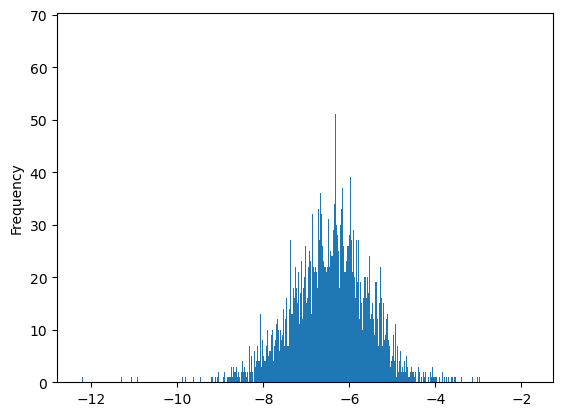

In [67]:
filtered_df.score1.plot.hist(bins=10000)

In [68]:
def categorize_score(score):
    if score <= -9.0:
        return 'Strong'
    elif score <= -7.0:
        return 'Medium'
    else:
        return 'Weak'

filtered_df['affinity1'] = filtered_df['score1'].apply(categorize_score)
filtered_df['affinity2'] = filtered_df['score2'].apply(categorize_score)

/tmp/ipykernel_50982/3257551741.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['affinity1'] = filtered_df['score1'].apply(categorize_score)
/tmp/ipykernel_50982/3257551741.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['affinity2'] = filtered_df['score2'].apply(categorize_score)


In [69]:
filtered_df.affinity1.value_counts()

affinity1
Weak      40570
Medium    13460
Strong      282
Name: count, dtype: int64

In [70]:
filtered_df.affinity2.value_counts()

affinity2
Weak      41128
Medium    12856
Strong      328
Name: count, dtype: int64

In [71]:
filtered_df.score1.idxmin()

'CHEMBL3504494'

In [72]:
filtered_df.score1.min()

-12.272

In [73]:
filtered_df.score2.idxmin()

'CHEMBL3504494'

In [62]:
filtered_df.score2.min()

-11.614